# D206 Data Cleaning - Medical Data Performance Assessment
>Andrew Butler   
Student Id: 001053557   
MSDA   
Mentor: Linda Howell   

## Part I: Research Question
### A. Question
Can we determine the likelihood that a patient will be readmitted, if so can we isolate the factors that contribute the most to readmission and develop strategies to mitigate them.

### B. Description of Variables

The dataset contains 10,000 semi-anonymized records containing various information about the patient and their treatment including demographic information, readmission status, medical history, and treatment details.
For each record there are 50 variables, which are described here:

   -  CaseOrder(categorical): A placeholder variable to preserve the original order of the raw data file.
   -  Customer_id(categorical): Unique patient ID.
   -  Interaction, UID(categorical): Internal identifying variable.
   -  City(categorical): Patient city of residence.
   -  State(categorical): Patient state of residence.
   -  County(categorical): Patient county of residence.
   -  Zip(categorical): Patient zip code of residence.
   -  Lat(categorical), Lng(categorical): GPS coordinates of patient residence.
   -  Population(numeric): Population within a mile radius of patient, based on census data.
   -  Area(categorical): Area type (rural, urban, suburban).
   -  TimeZone(categorical): Time zone of patient residence.
   -  Job(categorical): Occupation of the patient (or primary insurance holder).
   -  Children(numeric): Number of children in the patient’s household.
   -  Age(numeric): Age of the patient.
   -  Education(categorical): Highest earned degree of patient.
   -  Employment(categorical): Employment status of patient.
   -  Income(numeric): Annual income of the patient (or primary insurance holder).
   -  Marital(categorical): Marital status of the patient (or primary insurance holder).
   -  Gender(categorical): Patient self-identification as male, female, or non-binary.
   -  ReAdmis(categorical): Whether or not the patient was readmitted within a month of release.
   -  VitD_levels(numeric): The patient’s vitamin D levels as measured in ng/mL.
   -  Doc_visits(numeric): Number of times the primary physician visited the patient during the initial hospitalization.
   -  Full_meals_eaten(numeric): Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested).
   -  VitD_supp(numeric): The number of times that vitamin D supplements were administered to the patient.
   -  Soft_drink(categorical): Whether or not the patient habitually drinks three or more sodas in a day.
   - Initial_admin(categorical): The means by which the patient was admitted into the hospital initially (emergency admission, elective admission, observation).
   -  HighBlood(categorical): Whether or not the patient has high blood pressure.
   -  Stroke(categorical): Whether or not the patient has had a stroke.
   -  Complication_risk(categorical): Level of complication risk for the patient(high, medium, low).
   -  Overweight(categorical): Whether or not the patient is considered overweight.
   -  Arthritis(categorical): Whether or not the patient has arthritis.
   -  Diabetes(categorical): Whether or not the patient has diabetes.
   -  Hyperlipidemia(categorical): Whether the patient has hyperlipidemia.
   - BackPain(categorical): Whether or not the patient has chronic back pain.
   -  Anxiety(categorical): Whether or not the patient has an anxiety disorder.
   -  Allergic_rhinitis(categorical): Whether or not the patient has allergic rhinitis.
   -  Reflux_esophagitis(categorical): Whether or not the patient has reflux esophagitis.
   -  Asthma(categorical): Whether or not the patient has asthma.
   -  Services(categorical): Primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI).
   - Initial_days(numeric): The number of days the patient stayed in the hospital during the initial visit.
   -  TotalCharge(numeric): The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients, not including specialized treatments.
   -  Additional_charges(numeric): The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc.

> The following variables represent responses to an eight-question survey asking customers
to rate the importance of various factors/surfaces on a scale of 1 to 8 (1 = most important,
8 = least important)
    >-  Item1(categorical): Timely admission
    >-  Item2(categorical): Timely treatment
    >-  Item3(categorical): Timely visits
    >-  Item4(categorical): Reliability
    >-  Item5(categorical): Options
    >-  Item6(categorical): Hours of treatment
    >-  Item7(categorical): Courteous staff
    >-  Item8(categorical): Evidence of active listening from doctor

## Part II: Data-Cleaning Plan

### C. Explanation of data cleaning plan
1. My plan for cleaning the data set will follow these steps:
    1. Import the raw data set and converting it to a dataframe using the read_csv function provided by the pandas library.
    1. Use the functions provided by Pandas to inspect the structure of the data and get detailed information about variables
    1. Remove redundant columns, columns that potentially contain PID, and columns that will not contribute meaningfully to analysis.
    1. Standardize column names, and update column names that are vague or ambiguous to be more descriptive.
    1. Check for duplicate rows, or rows that only contain null values and drop them.
    1. Determine which columns contain null values, and impute null values and add them to a separate dataframe.
        - impute categorical variables using mode. 
        - use histograms to analyze numerical data columns that contain nulls and determine the best method to impute null values.
    1. Merge changes from last step into main data frame.
    1. Use pandas to view unique values of each column.
    1. Analyze the results of the previous step to determine if any columns contain incorrect data, need to be converted to a different data type, or have their precision reduced and take those actions as needed.
    1. Isolate numeric values for outlier detection and add them to a separate dataframe.
    1. Calculate Z-scores for numeric data, and use Z-scores and box plots to identify outliers.
    1. Add column identifying outliers for each numeric column to main dataframe.
    1. Re-express ordinal and binary categorical variables.
    1. Preform Principal Component Analysis.
    1. Export cleaned data as csv.

2. Approach
    - Because the data set contains an amount of missing data that cannot be simply dropped without substantially skewing the data, I will analyze each column that has missing values and determine the best method for imputation. 
    -  Several columns contain outliers, but many of them fall within acceptable ranges for their type, so I have opted to add an additional column to the dataset identifying when a variable is an outlier, rather than removing or impuning them, so they can easily be included or excluded in future analysis.
    -  I will reduce the precision of values where it is necessary, or re-express the categories of columns where it would meaningfully reduce the amount of categories for that variable without causing a meaningful loss of information.
1. I have decided to use Python 3 in a Jupyter notebook environment to analyze and clean the dataset, because of my familiarity with its ecosystem, the ease of presenting my findings that Jupyter notebooks provides, and the availability of specialized tools and packages for data analysis. I will be using the flowing packages:
    - numpy - required for pandas
    - pandas - to organize and manipulate data into data frames.
    - matplotlib, seaborn - for creating charts to aid in analysis.
    - scipy: libraries that provides statistical functions.
    - sklearn: provides models to preform PCA.
1. The code I am using preform the above mentioned steps and and the results of its execution is shown here:

In [11]:
#install necessary packages if not already installed
import sys
!conda install --yes --prefix {sys.prefix} pandas numpy matplotlib seaborn scipy scikit-learn

Solving environment: ...working... done

# All requested packages already installed.



In [12]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
%matplotlib inline

In [13]:
#import raw data as dataframe
df = pd.read_csv('medical_raw_data.csv')
#inspect structure of data
print(df.shape)

(10000, 53)


In [14]:
print(df.describe())

        Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  50159.323900     38.751099    -91.243080   
std     2886.89568   2886.89568  27469.588208      5.403085     15.205998   
min        1.00000      1.00000    610.000000     17.967190   -174.209690   
25%     2500.75000   2500.75000  27592.000000     35.255120    -97.352982   
50%     5000.50000   5000.50000  50207.000000     39.419355    -88.397230   
75%     7500.25000   7500.25000  72411.750000     42.044175    -80.438050   
max    10000.00000  10000.00000  99929.000000     70.560990    -65.290170   

          Population     Children          Age         Income   VitD_levels  \
count   10000.000000  7412.000000  7586.000000    7536.000000  10000.000000   
mean     9965.253800     2.098219    53.295676   40484.438268     19.412675   
std     14824.758614     2.155427    20.659182   28664.861050      6.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [16]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [17]:
#remove redundant columns, and columns that will not contribute meaningfully to analysis  
#column Unnamed: 0 is removed because it is functionally identical to CaseOrder, Lat and Lng are  
#dropped due to being personally identifiable information about patient that do not contribute  
#more meaningfully to analysis than anonomized columns such as Area and Timezone already do.  
#other columns are dropped due to being internal system labels that are not useful for analysis.  
#set index to colum CaseOrder
df = df.drop(columns=["Unnamed: 0", "Customer_id", "Interaction", "UID", "Lat", "Lng"])

In [18]:
df.rename(columns={"CaseOrder" : "Case_order"}, inplace=True)
df = df.set_index("Case_order", drop = True)
df.head()

,City,State,County,Zip,Population,Area,Timezone,Job,Children,Age,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Case_order,,,,,,,,,,,,,,,,,,,,,
1,Eva,AL,Morgan,35621,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,Marianna,FL,Jackson,32446,11303,Urban,America/Chicago,Community development worker,3.0,51.0,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,Sioux Falls,SD,Minnehaha,57110,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,New Richland,MN,Waseca,56072,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,West Point,VA,King William,23181,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [19]:
df.columns

Index(['City', 'State', 'County', 'Zip', 'Population', 'Area', 'Timezone',
       'Job', 'Children', 'Age', 'Education', 'Employment', 'Income',
       'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [20]:
#standardise column names, and update column names to be more descriptive
df.rename(columns={"Marital": "Mariage_status", "ReAdmis": "Readmited", "VitD_supp": "VitD_supplements",
                  "Soft_drink": "Habitual_soft_drink_use", "BackPain": "Back_pain", "Services": 
                  "Primary_service_recived", "HighBlood": "High_blood_pressure", "TotalCharge": "Total_charge",
                  "Item1": "Survey_timely_addmission", "Item2": "Survey_timely_treatment", 
                  "Item3": "Survey_timely_visits", "Item4": "Survey_reliability", 
                  "Item5": "Survey_options", "Item6": "Survey_hours", 
                  "Item7": "Survey_courtesy", "Item8": "Survey_active_listening"}, inplace=True)

In [21]:
#check for duplicated rows
df.duplicated().any()

False

In [22]:
#check if any rows contain only null values
df.isnull().all(axis=1).any()

False

In [23]:
#determine which columns contain null values
contains_missing = df.loc[:,df.isnull().any()].copy()
contains_missing

,Children,Age,Income,Habitual_soft_drink_use,Overweight,Anxiety,Initial_days
Case_order,,,,,,,
1,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
2,3.0,51.0,46805.99,No,1.0,NaN,15.129562
3,3.0,53.0,14370.14,No,1.0,NaN,4.772177
4,0.0,78.0,39741.49,No,0.0,NaN,1.714879
5,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807
...,...,...,...,...,...,...,...
9996,NaN,25.0,45967.61,No,NaN,1.0,51.561217
9997,4.0,87.0,14983.02,No,1.0,0.0,68.668237
9998,3.0,NaN,65917.81,Yes,1.0,1.0,NaN


In [24]:
#use mode to impute missing values in catagorical varibles(columns: Habitual_soft_drink_use, Overweight, Anxiety),
#mode is used due to the varibles being catagorical
contains_missing['Habitual_soft_drink_use'].fillna(contains_missing['Habitual_soft_drink_use'].mode()[0], inplace = True)
contains_missing['Overweight'].fillna(contains_missing['Overweight'].mode()[0], inplace = True)
contains_missing['Anxiety'].fillna(contains_missing['Anxiety'].mode()[0], inplace = True)
contains_missing


,Children,Age,Income,Habitual_soft_drink_use,Overweight,Anxiety,Initial_days
Case_order,,,,,,,
1,1.0,53.0,86575.93,No,0.0,1.0,10.585770
2,3.0,51.0,46805.99,No,1.0,0.0,15.129562
3,3.0,53.0,14370.14,No,1.0,0.0,4.772177
4,0.0,78.0,39741.49,No,0.0,0.0,1.714879
5,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807
...,...,...,...,...,...,...,...
9996,NaN,25.0,45967.61,No,1.0,1.0,51.561217
9997,4.0,87.0,14983.02,No,1.0,0.0,68.668237
9998,3.0,NaN,65917.81,Yes,1.0,1.0,NaN


In [25]:
contains_missing['Habitual_soft_drink_use'].value_counts()

No     8056
Yes    1944
Name: Habitual_soft_drink_use, dtype: int64

In [26]:
contains_missing['Overweight'].value_counts()

1.0    7377
0.0    2623
Name: Overweight, dtype: int64

In [27]:
contains_missing['Anxiety'].value_counts()

0.0    7094
1.0    2906
Name: Anxiety, dtype: int64

<AxesSubplot:xlabel='Children', ylabel='Count'>

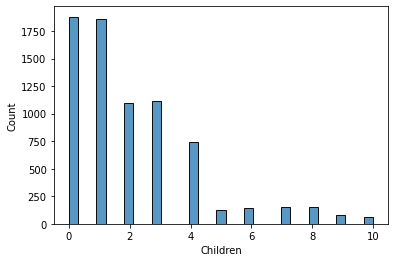

In [28]:
sns.histplot(contains_missing['Children'])

<AxesSubplot:xlabel='Children', ylabel='Count'>

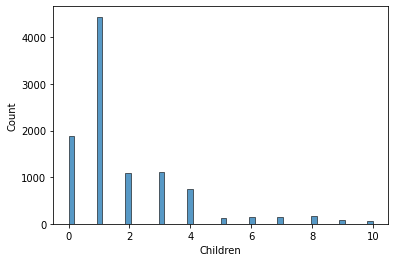

In [29]:
sns.histplot(contains_missing['Children'].fillna(contains_missing['Children'].median()))

<AxesSubplot:xlabel='Children', ylabel='Count'>

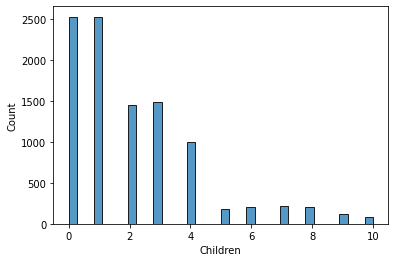

In [30]:
sns.histplot(contains_missing['Children'].interpolate(method='pad'))

In [31]:
#use interpolation to impune missing data for number of children. pad method is used to avoid adding values that are
#not whole numbers, interpolation is used because data skews to the right and using median to impune values caused 
# the amount of data points equaling 1 to more than double
contains_missing['Children'].interpolate(method='pad', inplace=True)

<AxesSubplot:xlabel='Children', ylabel='Count'>

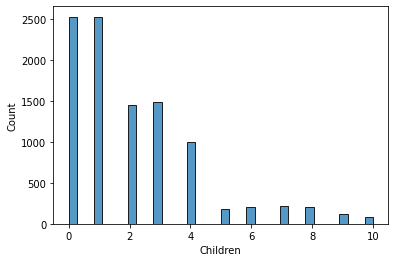

In [32]:
sns.histplot(contains_missing['Children'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

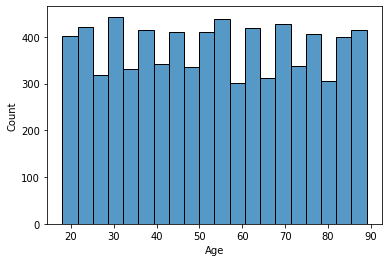

In [33]:
sns.histplot(contains_missing['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

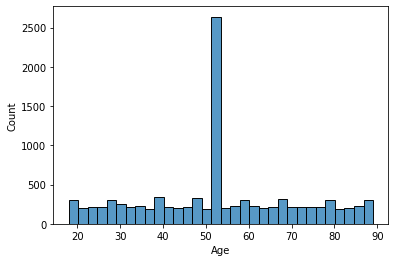

In [34]:
sns.histplot(contains_missing['Age'].fillna(contains_missing['Age'].mean()))

<AxesSubplot:xlabel='Age', ylabel='Count'>

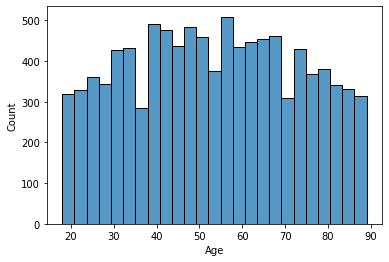

In [35]:
sns.histplot(contains_missing['Age'].interpolate())

In [36]:
#use interpolation to impune missing data for number patient age. interpolation is used because histogram revealed
#that data is evenly distributed, and using mean created a drastic change in the distribution.
contains_missing.interpolate(inplace=True)
contains_missing['Age'] = contains_missing['Age'].astype(int)

<AxesSubplot:xlabel='Age', ylabel='Count'>

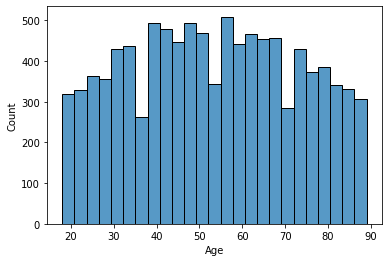

In [37]:
sns.histplot(contains_missing['Age'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

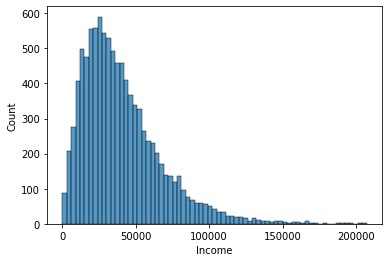

In [38]:
sns.histplot(contains_missing['Income'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

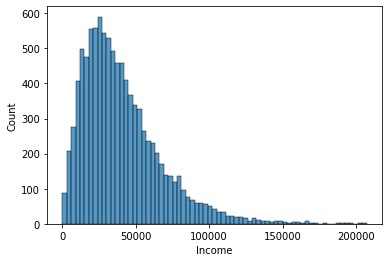

In [39]:
sns.histplot(contains_missing['Income'].fillna(contains_missing['Income'].median()))

<AxesSubplot:xlabel='Income', ylabel='Count'>

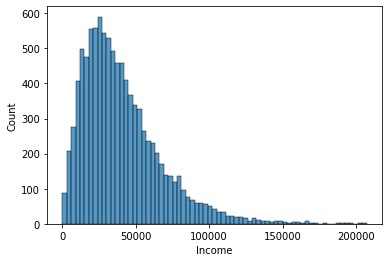

In [40]:
sns.histplot(contains_missing['Income'].interpolate())

In [41]:
#use median value to fill missing values in income column. median was chosen as imputation method because histogram
#reveled that data skews to the right, and there was no descernible difference bettwen imputation and interpolation
#in maintaining distrobution
contains_missing['Income'].fillna(contains_missing['Income'].median(), inplace = True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

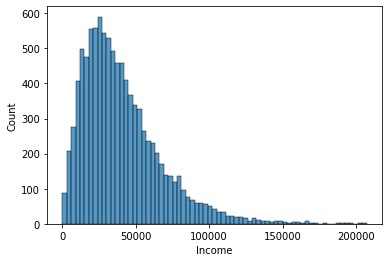

In [42]:
sns.histplot(contains_missing['Income'])

<AxesSubplot:xlabel='Initial_days'>

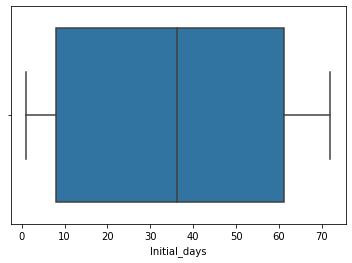

In [43]:
sns.boxplot(x=contains_missing['Initial_days'])

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

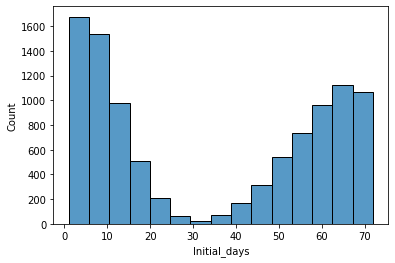

In [44]:
sns.histplot(contains_missing['Initial_days'])

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

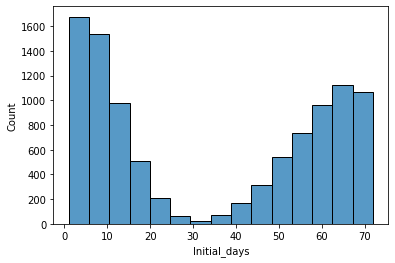

In [45]:
sns.histplot(contains_missing['Initial_days'].fillna(contains_missing['Initial_days'].mean()))

In [46]:
#use mean to impune missing data for number patient age. mean is used because histogram and box plot revealed
#that data has a bimodal distribution, and using mean maintains this distribution.
contains_missing['Initial_days'].fillna(contains_missing['Initial_days'].mean(), inplace=True)

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

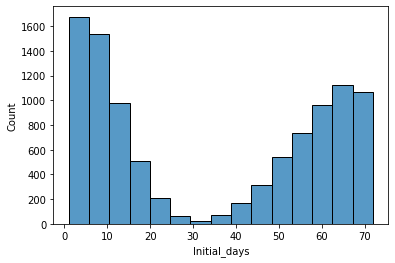

In [47]:
sns.histplot(contains_missing['Initial_days'])

In [48]:
#replace columns in original dataframe with corrected values in contains_missing dataframe
for x in contains_missing:
    df[x] = contains_missing[x]

In [49]:
#display unique values of each column
for col in df:
    print(col + ', ', df[col].dtypes,  ': ')
    print(df[col].unique())

City,  object : 
['Eva' 'Marianna' 'Sioux Falls' ... 'Milmay' 'Quinn' 'Coraopolis']
State,  object : 
['AL' 'FL' 'SD' 'MN' 'VA' 'OK' 'OH' 'MS' 'WI' 'IA' 'CA' 'IN' 'MO' 'MI'
 'NE' 'PA' 'AR' 'WV' 'KS' 'MA' 'KY' 'NY' 'VT' 'DC' 'IL' 'ND' 'SC' 'AK'
 'NM' 'NH' 'GA' 'NC' 'MD' 'TN' 'WA' 'TX' 'CO' 'NJ' 'LA' 'OR' 'AZ' 'ME'
 'ID' 'UT' 'RI' 'MT' 'PR' 'NV' 'CT' 'HI' 'WY' 'DE']
County,  object : 
['Morgan' 'Jackson' 'Minnehaha' ... 'Navarro' 'Los Alamos' 'Sterling']
Zip,  int64 : 
[35621 32446 57110 ...  8340 57775 15108]
Population,  int64 : 
[ 2951 11303 17125 ...  8368  7908 41524]
Area,  object : 
['Suburban' 'Urban' 'Rural']
Timezone,  object : 
['America/Chicago' 'America/New_York' 'America/Los_Angeles'
 'America/Indiana/Indianapolis' 'America/Detroit' 'America/Denver'
 'America/Nome' 'America/Anchorage' 'America/Phoenix' 'America/Boise'
 'America/Puerto_Rico' 'America/Yakutat' 'Pacific/Honolulu'
 'America/Menominee' 'America/Kentucky/Louisville'
 'America/Indiana/Vincennes' 'America/Toronto' 

In [50]:
#standardize time zones to utc, if a time zone does not observe daylight savings time it is appended with (ND)
timezone_dict = {'America/Chicago': 'UTC-6:00', 'America/New_York': 'UTC-5:00', 'America/Los_Angeles': 'UTC-8:00', 
 'America/Indiana/Indianapolis': 'UTC-5:00', 'America/Detroit': 'UTC-5:00', 'America/Denver': 'UTC-7:00',
 'America/Nome': 'UTC-9:00',  'America/Anchorage': 'UTC-9:00',  'America/Phoenix': 'UTC-8:00(ND)', 
 'America/Boise': 'UTC-8:00', 'America/Puerto_Rico': 'UTC-4:00(ND)',  'America/Yakutat': 'UTC-9:00',
 'Pacific/Honolulu': 'UTC-10:00(ND)', 'America/Menominee': 'UTC-6:00', 'America/Kentucky/Louisville': 'UTC-5:00',
 'America/Indiana/Vincennes': 'UTC-5:00', 'America/Toronto': 'UTC-5:00', 'America/Indiana/Marengo': 'UTC-5:00',
 'America/Indiana/Winamac': 'UTC-5:00', 'America/Indiana/Tell_City': 'UTC-6:00', 'America/Sitka': 'UTC-9:00',
 'America/Indiana/Knox': 'UTC-6:00', 'America/North_Dakota/New_Salem': 'UTC-6:00', 'America/Indiana/Vevay': 'UTC-5:00',
 'America/Adak': 'UTC-10:00', 'America/North_Dakota/Beulah': 'UTC-6:00'}
df['Timezone'].replace(timezone_dict, inplace = True)
df['Timezone']

Case_order
1        UTC-6:00
2        UTC-6:00
3        UTC-6:00
4        UTC-6:00
5        UTC-5:00
           ...   
9996     UTC-5:00
9997     UTC-5:00
9998     UTC-6:00
9999     UTC-7:00
10000    UTC-5:00
Name: Timezone, Length: 10000, dtype: object

In [51]:
#Convert columns that that express whole number values that are currently float to int
df.loc[:,['Children', 'Overweight', 'Anxiety']] = df[['Children', 'Overweight', 'Anxiety']].astype(int)

In [52]:
#convert zip colum to string type, identify records with invalid zip codes
df['Zip'] = df['Zip'].astype(str)

In [53]:
invalid_zips = df['Zip'].apply(len) != 5
invalid_list = df.loc[invalid_zips, ['Zip', 'City', 'State']]
invalid_list

,Zip,City,State
Case_order,,,
32,2584,Nantucket,MA
36,5043,East Thetford,VT
37,2468,Waban,MA
38,2138,Cambridge,MA
68,3464,Stoddard,NH
...,...,...,...
9976,4415,Brownville Junction,ME
9977,6084,Tolland,CT
9983,8401,Atlantic City,NJ


In [54]:
#list all invalid zip codes, cities, and states in list 
for i in range(0, invalid_list.shape[0]):
    print(invalid_list.iloc[i])
#while manualy cross referencing this data against a 
#United states zip code database(https://www.zipdatamaps.com/index.php),
#it became apparent that the invalid zip codes where caused by leading 0's being ommited

Zip           2584
City     Nantucket
State           MA
Name: 32, dtype: object
Zip               5043
City     East Thetford
State               VT
Name: 36, dtype: object
Zip       2468
City     Waban
State       MA
Name: 37, dtype: object
Zip           2138
City     Cambridge
State           MA
Name: 38, dtype: object
Zip          3464
City     Stoddard
State          NH
Name: 68, dtype: object
Zip           8332
City     Millville
State           NJ
Name: 109, dtype: object
Zip               7935
City     Green Village
State               NJ
Name: 114, dtype: object
Zip            7882
City     Washington
State            NJ
Name: 120, dtype: object
Zip          3462
City     Spofford
State          NH
Name: 145, dtype: object
Zip        4408
City     Aurora
State        ME
Name: 149, dtype: object
Zip                  4940
City     Farmington Falls
State                  ME
Name: 172, dtype: object
Zip         2889
City     Warwick
State         RI
Name: 174, dtype: object
Zip   

Name: 2557, dtype: object
Zip            2122
City     Dorchester
State            MA
Name: 2582, dtype: object
Zip         1510
City     Clinton
State         MA
Name: 2590, dtype: object
Zip            2912
City     Providence
State            RI
Name: 2591, dtype: object
Zip            5361
City     Whitingham
State            VT
Name: 2619, dtype: object
Zip          3106
City     Hooksett
State          NH
Name: 2628, dtype: object
Zip           7450
City     Ridgewood
State           NJ
Name: 2632, dtype: object
Zip            5658
City     Marshfield
State            VT
Name: 2661, dtype: object
Zip           7450
City     Ridgewood
State           NJ
Name: 2667, dtype: object
Zip             1118
City     Springfield
State             MA
Name: 2671, dtype: object
Zip           4614
City     Blue Hill
State           ME
Name: 2686, dtype: object
Zip               1088
City     West Hatfield
State               MA
Name: 2692, dtype: object
Zip       1970
City     Salem
State     

Name: 4702, dtype: object
Zip            4554
City     New Harbor
State            ME
Name: 4703, dtype: object
Zip               703
City     Aguas Buenas
State              PR
Name: 4737, dtype: object
Zip           987
City     Carolina
State          PR
Name: 4739, dtype: object
Zip          7524
City     Paterson
State          NJ
Name: 4785, dtype: object
Zip           8027
City     Gibbstown
State           NJ
Name: 4789, dtype: object
Zip        6517
City     Hamden
State        CT
Name: 4801, dtype: object
Zip            7095
City     Woodbridge
State            NJ
Name: 4804, dtype: object
Zip           1029
City     East Otis
State           MA
Name: 4812, dtype: object
Zip           8501
City     Allentown
State           NJ
Name: 4838, dtype: object
Zip                4623
City     Columbia Falls
State                ME
Name: 4840, dtype: object
Zip          7981
City     Whippany
State          NJ
Name: 4843, dtype: object
Zip         7940
City     Madison
State         N

Name: 6189, dtype: object
Zip         2061
City     Norwell
State         MA
Name: 6198, dtype: object
Zip                 2494
City     Needham Heights
State                 MA
Name: 6202, dtype: object
Zip           1008
City     Blandford
State           MA
Name: 6209, dtype: object
Zip           1602
City     Worcester
State           MA
Name: 6223, dtype: object
Zip             5158
City     Westminster
State             VT
Name: 6239, dtype: object
Zip                5452
City     Essex Junction
State                VT
Name: 6257, dtype: object
Zip          7701
City     Red Bank
State          NJ
Name: 6263, dtype: object
Zip          5828
City     Danville
State          VT
Name: 6282, dtype: object
Zip                3259
City     North Sandwich
State                NH
Name: 6288, dtype: object
Zip         3836
City     Freedom
State         NH
Name: 6313, dtype: object
Zip           7004
City     Fairfield
State           NJ
Name: 6349, dtype: object
Zip          6798
City   

Name: 7847, dtype: object
Zip             1074
City     South Barre
State             MA
Name: 7873, dtype: object
Zip                7417
City     Franklin Lakes
State                NJ
Name: 7877, dtype: object
Zip               1350
City     Monroe Bridge
State               MA
Name: 7884, dtype: object
Zip                  8853
City     Neshanic Station
State                  NJ
Name: 7893, dtype: object
Zip           773
City     Luquillo
State          PR
Name: 7898, dtype: object
Zip           926
City     San Juan
State          PR
Name: 7903, dtype: object
Zip               1583
City     West Boylston
State               MA
Name: 7928, dtype: object
Zip         610
City     Anasco
State        PR
Name: 7946, dtype: object
Zip                 1561
City     South Lancaster
State                 MA
Name: 7949, dtype: object
Zip               5873
City     West Danville
State               VT
Name: 7959, dtype: object
Zip          6905
City     Stamford
State          CT
Name: 796

In [55]:
#correct invalid zipcodes
invalid_zip_indexes = invalid_list.index.values
for x in invalid_zip_indexes:
    df.loc[x, 'Zip'] = df.loc[x, 'Zip'].zfill(5)

In [56]:
df['Zip'][df['Zip'].apply(len) != 5]

Series([], Name: Zip, dtype: object)

In [57]:
df.loc[invalid_zip_indexes, 'Zip']

Case_order
32      02584
36      05043
37      02468
38      02138
68      03464
        ...  
9976    04415
9977    06084
9983    08401
9994    07647
9997    08340
Name: Zip, Length: 723, dtype: object

In [58]:
#Round total and aditional charges to 2 decimal places. These values were generated based on averages
#and were not standardized for typical use of monatary values
df[['Total_charge', 'Additional_charges']] = np.around(df[['Total_charge', 'Additional_charges']], 2)
df[['Total_charge', 'Additional_charges']]

,Total_charge,Additional_charges
Case_order,,
1,3191.05,17939.40
2,4214.91,17613.00
3,2177.59,17505.19
4,2465.12,12993.44
5,1885.66,3716.53
...,...,...
9996,6651.24,8927.64
9997,7851.52,28507.15
9998,7725.95,15281.21


In [59]:
#reduce precision of initial days varible to allow for more meaningful data analysis
df[['Initial_days']] = np.around(df[['Initial_days']], 1)
df['Initial_days'].value_counts()

3.3     56
1.3     48
7.8     47
2.8     44
1.6     43
        ..
22.7     1
32.1     1
28.9     1
25.0     1
31.8     1
Name: Initial_days, Length: 646, dtype: int64

In [60]:
#isolate numeric values for outlier detection
numeric_data = df[['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 
       'VitD_supplements', 'Initial_days', 'Total_charge', 'Additional_charges']].copy()

In [61]:
#Outliers are identified and isolated using a combination of box plots and z scores. Where needed histograms are used 
#for further analysis. In cases where z scores were not suitable for outlier isolation iqr was used instead. 
#outliers are stored in a seperate varible named <varible_name>_outliers, but not removed from the original dataset. 
#This is done so that analysis can be performed on dataset both including and excluding outliers, 
#because while outliers are present they are not abnormal values for the data type. 
#helper function to add boolean outlier column to main dataframe for a specific column. this can be used during later
#data analysis to easily include or exclude outliers from analysis
def Add_outlier_column(data_frame, outliers, column):
    data_frame[column + '_outliers'] = False
    for x in outliers.index:
        data_frame.at[x-1, column + '_outliers'] = True

In [62]:
for x in numeric_data:
    numeric_data[x + '_z'] = stats.zscore(numeric_data[x])
numeric_data

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supplements,Initial_days,Total_charge,...,Children_z,Age_z,Income_z,VitD_levels_z,Doc_visits_z,Full_meals_eaten_z,VitD_supplements_z,Initial_days_z,Total_charge_z,Additional_charges_z
Case_order,,,,,,,,,,,,,,,,,,,,,
1,2951,1,53,86575.93,17.802330,6,0,0,10.6,3191.05,...,-0.510287,-0.014419,1.709132,-0.239530,0.944647,-0.993387,-0.634713,-0.908650,-0.799579,0.765005
2,11303,3,51,46805.99,18.994640,4,2,1,15.1,4214.91,...,0.412224,-0.117337,0.233169,-0.062181,-0.967981,0.990609,0.956445,-0.737310,-0.496427,0.715114
3,17125,3,53,14370.14,17.415889,4,1,0,4.8,2177.59,...,0.412224,-0.014419,-0.970607,-0.297011,-0.967981,-0.001389,-0.634713,-1.129488,-1.099651,0.698635
4,2162,0,78,39741.49,17.420079,4,1,0,1.7,2465.12,...,-0.971543,1.272056,-0.029012,-0.296388,-0.967981,-0.001389,-0.634713,-1.247522,-1.014517,0.009005
5,5287,0,22,1209.56,16.870524,5,0,2,1.3,1885.66,...,-0.971543,-1.609647,-1.459030,-0.378131,-0.011667,-0.993387,2.547602,-1.262752,-1.186087,-1.408990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,4762,6,25,45967.61,16.481612,4,2,1,51.6,6651.24,...,1.795992,-1.455270,0.202055,-0.435979,-0.967981,0.990609,0.956445,0.652447,0.224938,-0.612461
9997,1251,4,87,14983.02,18.451601,5,0,0,68.7,7851.52,...,0.873480,1.735187,-0.947862,-0.142954,-0.011667,-0.993387,-0.634713,1.303539,0.580324,2.380307
9998,532,3,65,65917.81,15.752751,4,2,0,66.0,7725.95,...,0.412224,0.603089,0.942457,-0.544393,-0.967981,0.990609,-0.634713,1.200735,0.543145,0.358695


<AxesSubplot:xlabel='Population'>

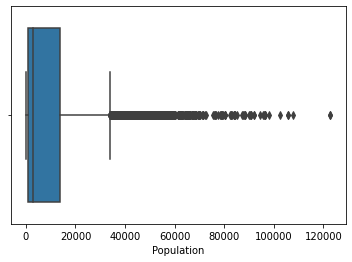

In [63]:
sns.boxplot(x=numeric_data['Population'])

In [64]:
population_outliers = numeric_data.loc[(numeric_data['Population_z'] > 3) | (numeric_data['Population_z'] < -3),
                 ['Population', 'Population_z']]
Add_outlier_column(df, population_outliers, 'Population')
population_outliers.sort_values('Population')

,Population,Population_z
Case_order,,
289,54453,3.001059
965,54460,3.001531
6797,54507,3.004701
3820,54647,3.014146
3186,54647,3.014146
...,...,...
768,105799,6.464762
7687,105799,6.464762
5966,107700,6.593000


In [65]:
population_outliers.sort_values('Population').value_counts()

Population  Population_z
57775       3.225154        3
83960       4.991545        3
67597       3.887728        3
59129       3.316493        2
84418       5.022441        2
                           ..
59699       3.354944        1
60033       3.377475        1
60081       3.380713        1
60107       3.382467        1
63425       3.606293        1
Length: 186, dtype: int64

<AxesSubplot:xlabel='Children'>

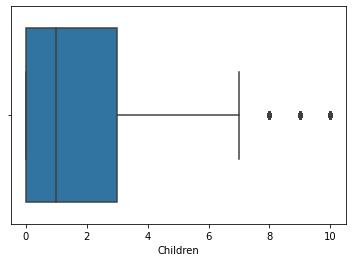

In [66]:
sns.boxplot(x=numeric_data['Children'])

In [67]:
children_outliers = numeric_data.loc[(numeric_data['Children_z'] > 3) | (numeric_data['Children_z'] < -3),
                 ['Children', 'Children_z']]
Add_outlier_column(df, children_outliers, 'Children')
children_outliers.sort_values('Children')

,Children,Children_z
Case_order,,
4459,9,3.179759
4134,9,3.179759
4110,9,3.179759
4049,9,3.179759
4048,9,3.179759
...,...,...
2282,10,3.641015
2196,10,3.641015
2125,10,3.641015


In [68]:
children_outliers.sort_values('Children').value_counts()

Children  Children_z
9         3.179759      125
10        3.641015       85
dtype: int64

<AxesSubplot:xlabel='Age'>

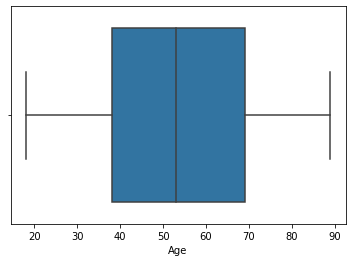

In [69]:
sns.boxplot(x=numeric_data['Age'])

<AxesSubplot:xlabel='Income'>

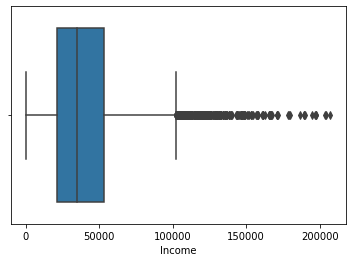

In [70]:
sns.boxplot(x=numeric_data['Income'])

In [71]:
income_outliers = numeric_data.loc[(numeric_data['Income_z'] > 3) | (numeric_data['Income_z'] < -3),
                 ['Income', 'Income_z']]
Add_outlier_column(df, income_outliers, 'Income')
income_outliers.sort_values('Income')

,Income,Income_z
Case_order,,
1515,121766.35,3.015137
9345,121931.19,3.021255
9956,122291.51,3.034627
9141,122361.47,3.037224
37,122615.82,3.046663
...,...,...
1779,197576.18,5.828632
6407,197675.05,5.832301
8599,203774.65,6.058672


In [72]:
income_outliers.sort_values('Income').value_counts()

Income     Income_z
121766.35  3.015137    1
148944.14  4.023774    1
147303.68  3.962892    1
147570.86  3.972808    1
148141.83  3.993998    1
                      ..
129987.32  3.320238    1
129945.51  3.318687    1
129586.68  3.305370    1
129349.07  3.296551    1
207249.13  6.187619    1
Length: 140, dtype: int64

<AxesSubplot:xlabel='VitD_levels'>

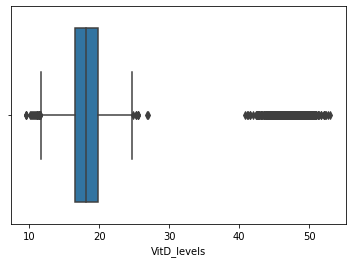

In [73]:
sns.boxplot(x=numeric_data['VitD_levels'])

<AxesSubplot:xlabel='VitD_levels', ylabel='Count'>

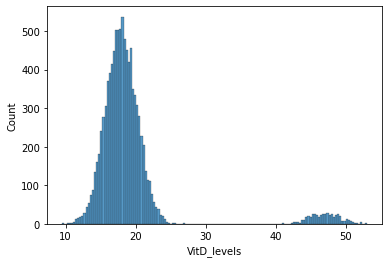

In [74]:
sns.histplot(numeric_data['VitD_levels'])

In [75]:
# VitD column in both numeric data and full data frame precision reduced to tenths decimal place to 
#conform to typical measurement of data of this type as shown listed in sources.

numeric_data[['VitD_levels']] = df[['VitD_levels']] = np.around(numeric_data['VitD_levels'], 1)
numeric_data['VitD_levels_z'] = stats.zscore(numeric_data['VitD_levels'])

<AxesSubplot:xlabel='VitD_levels'>

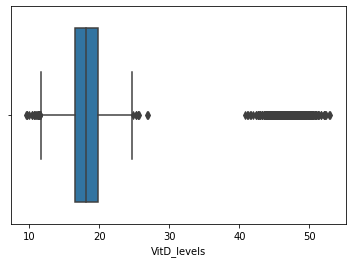

In [76]:
sns.boxplot(x=numeric_data['VitD_levels'])

<AxesSubplot:xlabel='VitD_levels', ylabel='Count'>

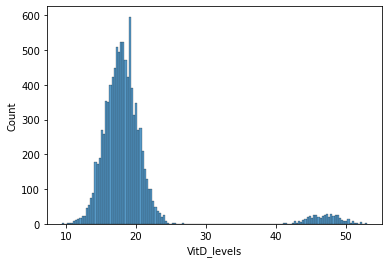

In [77]:
sns.histplot(numeric_data['VitD_levels'])

In [78]:
vitD_levels_outliers = numeric_data.loc[(numeric_data['VitD_levels_z'] > 3) | (numeric_data['VitD_levels_z'] < -3),
                 ['VitD_levels', 'VitD_levels_z']]
Add_outlier_column(df, vitD_levels_outliers, 'VitD_levels')
vitD_levels_outliers.sort_values('VitD_levels')

,VitD_levels,VitD_levels_z
Case_order,,
8198,40.8,3.181200
787,41.1,3.225822
7271,41.2,3.240697
2947,41.5,3.285319
5689,41.6,3.300193
...,...,...
2616,52.2,4.876861
7231,52.3,4.891736
7158,52.4,4.906610


In [79]:
vitD_levels_outliers.sort_values('VitD_levels').value_counts()

VitD_levels  VitD_levels_z
47.8         4.222395         12
46.6         4.043905         11
48.5         4.326515         11
45.6         3.895162         11
45.9         3.939785         11
                              ..
42.0         3.359690          1
41.6         3.300193          1
41.5         3.285319          1
41.2         3.240697          1
53.0         4.995855          1
Length: 99, dtype: int64

<AxesSubplot:xlabel='Doc_visits'>

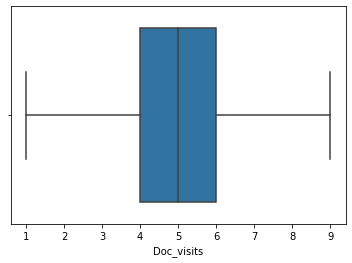

In [80]:
sns.boxplot(x=numeric_data['Doc_visits'])

In [81]:
doc_visits_outliers = numeric_data.loc[(numeric_data['Doc_visits_z'] > 3) | (numeric_data['Doc_visits_z'] < -3),
                 ['Doc_visits', 'Doc_visits_z']]
Add_outlier_column(df, doc_visits_outliers, 'Doc_visits')
doc_visits_outliers.sort_values('Doc_visits')

,Doc_visits,Doc_visits_z
Case_order,,
5646,1,-3.836921
5757,1,-3.836921
6018,1,-3.836921
6499,1,-3.836921
6943,1,-3.836921
7144,1,-3.836921
963,9,3.813587
2767,9,3.813587


In [82]:
doc_visits_outliers.sort_values('Doc_visits').value_counts()

Doc_visits  Doc_visits_z
1           -3.836921       6
9            3.813587       2
dtype: int64

<AxesSubplot:xlabel='Full_meals_eaten'>

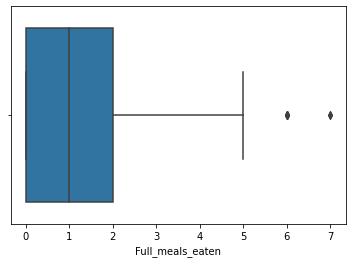

In [83]:
sns.boxplot(x=numeric_data['Full_meals_eaten'])

In [84]:
full_meals_eaten_outliers = numeric_data.loc[
    (numeric_data['Full_meals_eaten_z'] > 3) | (numeric_data['Full_meals_eaten_z'] < -3),
                 ['Full_meals_eaten', 'Full_meals_eaten_z']]
Add_outlier_column(df, full_meals_eaten_outliers, 'Full_meals_eaten')
full_meals_eaten_outliers.sort_values('Full_meals_eaten')

,Full_meals_eaten,Full_meals_eaten_z
Case_order,,
551,5,3.966603
9068,5,3.966603
8995,5,3.966603
8903,5,3.966603
8327,5,3.966603
6803,5,3.966603
6695,5,3.966603
6084,5,3.966603
6027,5,3.966603


In [85]:
full_meals_eaten_outliers.sort_values('Full_meals_eaten').value_counts()

Full_meals_eaten  Full_meals_eaten_z
5                 3.966603              25
6                 4.958602               6
7                 5.950600               2
dtype: int64

<AxesSubplot:xlabel='VitD_supplements'>

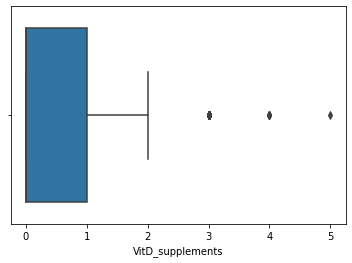

In [86]:
sns.boxplot(x=numeric_data['VitD_supplements'])

In [87]:
vitD_supplements_outliers = numeric_data.loc[
    (numeric_data['VitD_supplements_z'] > 3) | (numeric_data['VitD_supplements_z'] < -3),
                 ['VitD_supplements', 'VitD_supplements_z']]
Add_outlier_column(df, vitD_supplements_outliers, 'VitD_Supplements')
vitD_supplements_outliers.sort_values('VitD_supplements')

,VitD_supplements,VitD_supplements_z
Case_order,,
63,3,4.138759
5000,3,4.138759
5045,3,4.138759
5217,3,4.138759
5352,3,4.138759
...,...,...
1343,4,5.729917
9092,4,5.729917
7181,4,5.729917


In [88]:
vitD_supplements_outliers.sort_values('VitD_supplements').value_counts()

VitD_supplements  VitD_supplements_z
3                 4.138759              64
4                 5.729917               5
5                 7.321074               1
dtype: int64

<AxesSubplot:xlabel='Initial_days'>

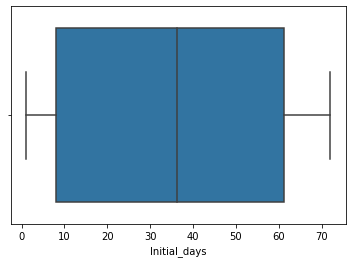

In [89]:
sns.boxplot(x=numeric_data['Initial_days'])

<AxesSubplot:xlabel='Total_charge'>

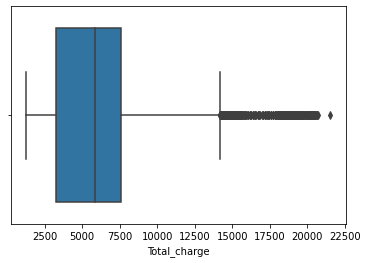

In [90]:
sns.boxplot(x=numeric_data['Total_charge'])

In [91]:
total_charge_outliers = numeric_data.loc[(numeric_data['Total_charge_z'] > 3) | (numeric_data['Total_charge_z'] < -3),
                 ['Total_charge', 'Total_charge_z']]
Add_outlier_column(df, total_charge_outliers, 'Total_Charge')
total_charge_outliers.sort_values('Total_charge')

,Total_charge,Total_charge_z
Case_order,,
528,16053.46,3.008810
3351,16057.31,3.009950
1848,16153.99,3.038575
3000,16173.62,3.044388
1964,16194.01,3.050425
...,...,...
9160,20562.04,4.343740
5454,20632.44,4.364585
5245,20647.39,4.369011


In [92]:
total_charge_outliers.sort_values('Total_charge').value_counts()

Total_charge  Total_charge_z
16053.46      3.008810          1
19367.21      3.989967          1
19409.18      4.002394          1
19404.99      4.001153          1
19403.19      4.000620          1
                               ..
18550.12      3.748038          1
18557.70      3.750282          1
18564.13      3.752186          1
18575.97      3.755691          1
21524.22      4.628629          1
Length: 276, dtype: int64

<AxesSubplot:xlabel='Additional_charges'>

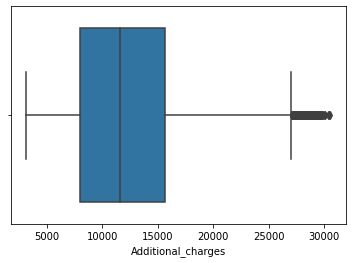

In [93]:
sns.boxplot(x=numeric_data['Additional_charges'])

<AxesSubplot:xlabel='Additional_charges', ylabel='Count'>

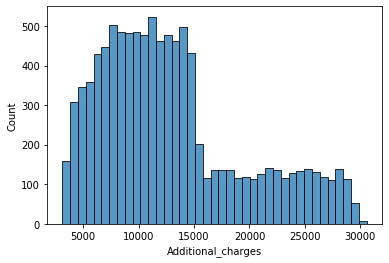

In [94]:
sns.histplot(x=numeric_data['Additional_charges'])

In [95]:
#iqr used because z score did not accurately capture outliers due to data distribution
iqr_a_charges = stats.iqr(numeric_data['Additional_charges'])
q1_a_charges = numeric_data['Additional_charges'].quantile(0.25)
q3_a_charges = numeric_data['Additional_charges'].quantile(0.75)
additional_charges_outliers = numeric_data.loc[
    (numeric_data['Additional_charges'] > (q3_a_charges * 1.5 + iqr_a_charges)) | (numeric_data['Additional_charges'] < (q1_a_charges * 1.5 - iqr_a_charges)),
                 ['Additional_charges']]
Add_outlier_column(df, additional_charges_outliers, 'Additional_charges')
additional_charges_outliers.sort_values('Additional_charges')

,Additional_charges
Case_order,
6452,3125.70
2415,3132.26
1478,3132.26
4232,3139.05
3515,3139.05
...,...
6465,4327.02
5288,4327.02
7279,4332.13


In [96]:
additional_charges_outliers.sort_values('Additional_charges').value_counts()

Additional_charges
3241.34               4
3585.74               3
3883.66               3
4228.07               3
4129.06               3
                     ..
3771.31               1
3767.15               1
3764.25               1
3760.09               1
4337.80               1
Length: 334, dtype: int64

In [97]:
#Re-expression of catagorical varibles:
#categorical columns that can ony be yes or no will be converted to 1, or 0. 
#categorical columns that can be expressed ordinally will have a numerical column added with their ordinal value, 
#in the format _numeric. --categorical columns that do not fit either of the prior categories will not be altered and 
#will be retained for use in data analysis as is.
df.columns

Index(['City', 'State', 'County', 'Zip', 'Population', 'Area', 'Timezone',
       'Job', 'Children', 'Age', 'Education', 'Employment', 'Income',
       'Mariage_status', 'Gender', 'Readmited', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supplements', 'Habitual_soft_drink_use',
       'Initial_admin', 'High_blood_pressure', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Back_pain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Primary_service_recived', 'Initial_days', 'Total_charge',
       'Additional_charges', 'Survey_timely_addmission',
       'Survey_timely_treatment', 'Survey_timely_visits', 'Survey_reliability',
       'Survey_options', 'Survey_hours', 'Survey_courtesy',
       'Survey_active_listening', 'Population_outliers', 'Children_outliers',
       'Income_outliers', 'VitD_levels_outliers', 'Doc_visits_outliers',
       'Full_meals_eaten_outliers', 'VitD_Supplements_outliers',

In [98]:
df.loc[:,['Readmited', 'Habitual_soft_drink_use', 'High_blood_pressure', 'Stroke', 'Arthritis','Diabetes', 
         'Hyperlipidemia', 'Back_pain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].replace({'Yes': 1, 'No': 0})

,Readmited,Habitual_soft_drink_use,High_blood_pressure,Stroke,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Allergic_rhinitis,Reflux_esophagitis,Asthma
Case_order,,,,,,,,,,,
1,0,0,1,0,1,1,0,1,1,0,1
2,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,1,1
5,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,1,0,0,0,0,0,0,1,0
9997,1,0,1,0,1,1,0,0,0,0,1
9998,1,1,1,0,0,0,0,0,1,0,0


In [99]:
education_dict = {'Some College, Less than 1 Year': 5,
       'Some College, 1 or More Years, No Degree': 6,
       'GED or Alternative Credential': 3, 'Regular High School Diploma': 4,
       "Bachelor's Degree": 9, "Master's Degree": 10,
       'Nursery School to 8th Grade': 1,
       '9th Grade to 12th Grade, No Diploma': 2, 'Doctorate Degree': 11,
       "Associate's Degree": 8, 'Professional School Degree': 7,
       'No Schooling Completed': 0}
df['Education_numeric'] = df['Education'].replace(education_dict)
df['Education_numeric'].value_counts()

4     2444
9     1724
6     1484
2      832
8      797
10     701
5      642
1      552
3      389
7      208
0      133
11      94
Name: Education_numeric, dtype: int64

In [100]:
complication_dict = {'Low': 0, 'Medium': 1, 'High': 2}
df['Complication_risk_numeric'] = df['Complication_risk'].replace(complication_dict)
df['Complication_risk_numeric'].value_counts()

1    4517
2    3358
0    2125
Name: Complication_risk_numeric, dtype: int64

Principal component Analysis

In [101]:
df_pca = df[["Population", "Age", "Income", "VitD_levels", "Initial_days", "Total_charge", "Additional_charges", "Survey_timely_addmission",
             "Survey_timely_treatment", "Survey_timely_visits", "Survey_reliability", "Survey_options", "Survey_hours",
             "Survey_courtesy", "Survey_active_listening", "Complication_risk_numeric"]]

In [102]:
df_pca

,Population,Age,Income,VitD_levels,Initial_days,Total_charge,Additional_charges,Survey_timely_addmission,Survey_timely_treatment,Survey_timely_visits,Survey_reliability,Survey_options,Survey_hours,Survey_courtesy,Survey_active_listening,Complication_risk_numeric
Case_order,,,,,,,,,,,,,,,,
1,2951,53,86575.93,17.8,10.6,3191.05,17939.40,3,3,2,2,4,3,3,4,1
2,11303,51,46805.99,19.0,15.1,4214.91,17613.00,3,4,3,4,4,4,3,3,2
3,17125,53,14370.14,17.4,4.8,2177.59,17505.19,2,4,4,4,3,4,3,3,1
4,2162,78,39741.49,17.4,1.7,2465.12,12993.44,3,5,5,3,4,5,5,5,1
5,5287,22,1209.56,16.9,1.3,1885.66,3716.53,2,1,3,3,5,3,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,4762,25,45967.61,16.5,51.6,6651.24,8927.64,3,2,2,3,4,3,4,2,1
9997,1251,87,14983.02,18.5,68.7,7851.52,28507.15,3,3,4,2,5,3,4,4,1
9998,532,65,65917.81,15.8,66.0,7725.95,15281.21,3,3,3,4,4,2,3,2,2


In [103]:
df_pca_normalized = (df_pca - df_pca.mean())/df_pca.std()
df_pca_normalized

,Population,Age,Income,VitD_levels,Initial_days,Total_charge,Additional_charges,Survey_timely_addmission,Survey_timely_treatment,Survey_timely_visits,Survey_reliability,Survey_options,Survey_hours,Survey_courtesy,Survey_active_listening,Complication_risk_numeric
Case_order,,,,,,,,,,,,,,,,
1,-0.473145,-0.014418,1.709047,-0.239860,-0.908604,-0.799539,0.764967,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397,-0.168864
2,0.090237,-0.117331,0.233157,-0.061378,-0.737273,-0.496402,0.715078,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009,1.200677
3,0.482959,-0.014418,-0.970559,-0.299354,-1.129431,-1.099596,0.698600,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009,-0.168864
4,-0.526366,1.271992,-0.029011,-0.299354,-1.247460,-1.014466,0.009004,-0.502730,1.443046,1.441677,-0.497066,0.488355,1.431165,1.474440,1.429802,-0.168864
5,-0.315570,-1.609567,-1.458957,-0.373722,-1.262689,-1.186028,-1.408919,-1.471754,-2.422343,-0.494890,-0.497066,1.459048,-0.506114,0.495396,-0.489009,-1.538406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.350984,-1.455198,0.202045,-0.433215,0.652414,0.224926,-0.612430,-0.502730,-1.455995,-1.463173,-0.497066,0.488355,-0.506114,0.495396,-1.448415,-0.168864
9997,-0.587818,1.735100,-0.947814,-0.135746,1.303474,0.580295,2.380188,-0.502730,-0.489648,0.473394,-1.462054,1.459048,-0.506114,0.495396,0.470397,-0.168864
9998,-0.636318,0.603059,0.942410,-0.537330,1.200675,0.543118,0.358677,-0.502730,-0.489648,-0.494890,0.467923,0.488355,-1.474753,-0.483647,-1.448415,1.200677


In [104]:
component_number = df_pca.shape[1]
pca = PCA(n_components = component_number)
pca = pca.fit(df_pca_normalized)

In [105]:
pca_columns = []
for i in range(1, component_number + 1):
    pca_columns.append("PC" + str(i))
pca_columns

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16']

In [106]:
df_pca_components = pd.DataFrame(pca.transform(df_pca_normalized), columns = pca_columns)
df_pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.535728,-1.166059,0.247782,0.683519,0.842751,-1.329184,1.124139,0.140740,1.309369,0.462301,0.591729,0.004999,0.734226,0.400176,-0.128484,0.021966
1,-0.335370,-0.645760,-0.176366,0.554742,1.185733,0.038088,-0.526781,-0.262993,-0.475043,-0.261596,0.497443,0.839671,0.335063,0.525564,0.658885,0.026241
2,-0.202643,-1.323492,-0.761551,0.580741,-0.208920,0.496684,-0.945738,0.772752,-0.622160,-0.477832,0.389151,-0.400082,-0.200802,0.482335,1.523072,0.104248
3,2.386521,-1.336477,0.317918,1.078790,-0.130114,-0.780522,-0.300955,0.286811,1.030263,0.684113,0.076642,0.219009,-0.839837,-0.831675,1.799686,-0.019168
4,-2.421516,-1.890243,-0.120102,-1.987082,-1.534425,-0.272241,-1.053780,1.074370,0.686573,1.348988,-0.281819,0.436187,-1.667385,0.511826,-0.103280,0.000746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.103208,0.039659,-0.107729,-1.471427,-0.350066,0.073672,0.433191,-0.604823,-0.437996,1.562367,0.228524,0.359812,0.078645,0.601202,-0.688118,-0.093963
9996,-0.666041,1.112658,1.413302,2.862242,-1.218419,0.399539,-0.068469,-0.821966,1.278966,0.811684,-0.283100,-0.097498,-0.809422,0.570105,0.356480,0.144493
9997,-1.901673,0.661713,0.156946,0.694169,0.628890,0.075790,0.687979,-1.800319,-1.171954,-0.042065,-0.841923,0.280861,0.192810,-0.191969,-0.189085,-0.068527
9998,0.820920,1.068572,0.986507,-0.988237,-0.756588,-0.093300,-0.144634,-0.592584,-0.739789,0.170496,-0.752657,0.908960,1.421993,-0.232237,-0.506994,0.153526


In [107]:
loadings = pd.DataFrame(pca.components_.T, columns=pca_columns, index=df_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Population,0.010362,0.016688,0.027855,-0.025958,0.325334,0.734726,0.201383,0.556621,0.007598,-0.024594,-0.007395,-0.022886,-0.027729,-0.009084,-0.005078,0.000447
Age,0.000054,0.073848,-0.030625,0.700266,-0.061654,0.000039,0.030904,0.040969,-0.004317,-0.031211,-0.027686,0.062475,-0.104608,-0.692641,-0.019669,-0.007604
Income,0.000334,-0.020439,-0.024192,0.000398,0.494925,-0.405712,0.762165,-0.025919,-0.084584,0.013183,-0.005484,0.017972,-0.009730,-0.008998,-0.003509,0.002691
VitD_levels,-0.009115,0.527040,0.037250,-0.044069,0.223165,-0.347973,-0.302589,0.418793,-0.001421,0.010890,-0.006858,-0.007904,0.007215,-0.006696,0.008693,0.529695
Initial_days,-0.018098,0.459401,0.070006,-0.066090,-0.296909,0.354795,0.377959,-0.452637,-0.011623,-0.023534,0.009500,0.010495,-0.002204,-0.006945,-0.018363,0.465088
Total_charge,-0.017624,0.698430,0.070213,-0.067872,0.008938,-0.017913,0.007562,-0.011043,-0.004001,-0.004839,-0.004081,-0.000876,0.000982,0.009461,0.004228,-0.708239
Additional_charges,0.004131,0.077414,-0.039310,0.701221,0.011142,0.025581,0.019338,-0.000349,0.013020,0.014352,0.041256,-0.065053,0.096759,0.695243,0.018654,0.014052
Survey_timely_addmission,0.454789,-0.019999,0.295228,0.017013,0.007306,-0.016526,-0.017296,0.005324,-0.096276,-0.074313,-0.010891,0.080368,0.188747,0.006992,-0.804722,-0.006593
Survey_timely_treatment,0.428522,-0.021550,0.291840,0.018835,-0.007487,0.004690,0.008752,0.007253,-0.148863,-0.133525,-0.062053,0.087067,0.621009,-0.086326,0.534459,-0.000119
Survey_timely_visits,0.395365,-0.020168,0.294343,0.015325,0.008897,-0.023331,-0.028293,-0.040239,-0.207440,-0.209338,-0.230675,-0.425830,-0.625098,0.066371,0.191819,0.004634


In [108]:
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized)/ df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

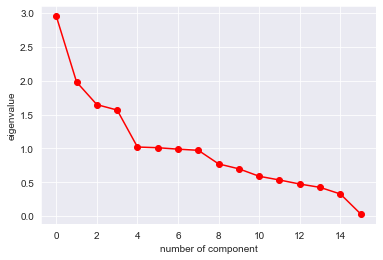

In [109]:
sns.set_style('darkgrid')
plt.plot(eigenvalues, 'ro-')
plt.xlabel("number of component")
plt.ylabel("eigenvalue")
plt.show()

In [110]:
eigenvalues

[2.9540878129785444,
 1.9815118980902646,
 1.647893356882892,
 1.567595662569451,
 1.0213461108725723,
 1.0112206936978132,
 0.9896952485605882,
 0.9727728788216048,
 0.7716036953231841,
 0.6989009760367672,
 0.5888498667484408,
 0.5339195750082404,
 0.4742183039682881,
 0.4248729760107605,
 0.327251753689872,
 0.03265919074060882]

In [111]:
eigen_count = 0
for x in eigenvalues:
    if x >= 1:
        eigen_count +=1
eigen_count

6

In [112]:
df_reduced = df_pca_components.iloc[:,:eigen_count]
df_reduced

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.535728,-1.166059,0.247782,0.683519,0.842751,-1.329184
1,-0.335370,-0.645760,-0.176366,0.554742,1.185733,0.038088
2,-0.202643,-1.323492,-0.761551,0.580741,-0.208920,0.496684
3,2.386521,-1.336477,0.317918,1.078790,-0.130114,-0.780522
4,-2.421516,-1.890243,-0.120102,-1.987082,-1.534425,-0.272241
...,...,...,...,...,...,...
9995,-2.103208,0.039659,-0.107729,-1.471427,-0.350066,0.073672
9996,-0.666041,1.112658,1.413302,2.862242,-1.218419,0.399539
9997,-1.901673,0.661713,0.156946,0.694169,0.628890,0.075790
9998,0.820920,1.068572,0.986507,-0.988237,-0.756588,-0.093300


In [113]:
loadings.iloc[:, :eigen_count]

,PC1,PC2,PC3,PC4,PC5,PC6
Population,0.010362,0.016688,0.027855,-0.025958,0.325334,0.734726
Age,0.000054,0.073848,-0.030625,0.700266,-0.061654,0.000039
Income,0.000334,-0.020439,-0.024192,0.000398,0.494925,-0.405712
VitD_levels,-0.009115,0.527040,0.037250,-0.044069,0.223165,-0.347973
Initial_days,-0.018098,0.459401,0.070006,-0.066090,-0.296909,0.354795
Total_charge,-0.017624,0.698430,0.070213,-0.067872,0.008938,-0.017913
Additional_charges,0.004131,0.077414,-0.039310,0.701221,0.011142,0.025581
Survey_timely_addmission,0.454789,-0.019999,0.295228,0.017013,0.007306,-0.016526
Survey_timely_treatment,0.428522,-0.021550,0.291840,0.018835,-0.007487,0.004690
Survey_timely_visits,0.395365,-0.020168,0.294343,0.015325,0.008897,-0.023331


In [114]:
#df.to_csv('medical_data_cleaned.csv')

# Part III: Data Cleaning
## D. Summarize of data-cleaning process:
1. Findings:  
    -  During the analysis I determined that there were 6 variables that are were redundant or unnecessary for analysis. Several variables had names that were not sufficiently descriptive, or deviated in naming standards from the majority of data in the datasets. 
    -  7 columns were found to contain missing values. 
    -  The time zone column contained 26 unique values, many of which are functionally identical for describing the time zone of the row, and any additional information these further granularity would provide were redundant. 3 columns that contained values that could only logically be expressed as whole integers, had a variable type of floating point number.     -  The zip-code column's data type was set as a numerical integer, when it could be more properly be expressed as a string for categorization and analytic purposes. further analysis of the zip column revealed that there were several invalid fields caused by a data entry error.  
    -  Total_charge and Additional_charge columns where based on averages and contained a much higher degree of precision than typical expression of monetary values. Initial days column contained a high degree of precision, that prevented meaningful grouping of its values. 
    -  11 numerical columns were selected for outlier detection, of these 9 were found to contain outlier. However, none of these outliers were outside of the logical range that their perspective value could contain. 
    -  11 columns were found to contain only yes or no values, and 2 columns were found to contain categories that could be expressed as a continuous variable.
    

2. Justification and Implementation summary:  
    -  Columns that were found to be redundant were dropped from the dataset, except for case_order which was set as the index of the data frame since it was functionally identical and more descriptive than index. Columns that had insufficiently descriptive names and non standard named were renamed and standardized. 
    -  Imputation of categorical variables that was handled by replacing null values with the mode for the column as suggested by Data Science: Using Python and R.( Larose, C. D. & Larose, D. T.   (2019)). For numerical columns with missing data, nulls were replaced with the mean of the data set. except in cases where comparing before and after histograms revealed that imputation had skewed the dataset, where median or interpolation were used instead to maintain data distribution. 
    -  The time zone column contained 27 unique values several of which mapped to standard UTC time zones. I replaced these values because it created a smaller number of groupings for analysis, and any additional information that would be provided by more granular time zone definitions, is already provided by state, city, and zip code columns. Columns that contained numerical data that should only logically consist of whole numbers(number of children, etc;) that were incorrectly typed as precision floating point numbers where converted to integers. 
    -  The zip code column was initially typed as a numerical column, but was converted to a string to make it easier to group as a categorical variable. after converting to a string validation was preformed and I discovered several items in this column that were invalid zip codes. I isolated these values and the state and city they belonged to, and by comparing them with a database of US zip codes determined that they were all valid zip codes whose leading zeros had been removed when they were cast as a numeric data type. 
    -  The total_charge and additional_charge columns were based on calculations of averages, and had a much higher precision than the standard representation of a monetary value, so they were rounded to two decimal places. The initial days column also contained a high degree of precision, and was rounded to tenths of a day to form more consistent groupings of values. 
    -  I identified 11 numerical data columns that could be checked for outliers, of these the age and initial_days columns contained no outliers. For the others outliers were identified and isolated using a combination of box plots and z scores, Where needed histograms were used for further analysis. In the case of the additional_charges column z scores were not suitable for outlier isolation due to data distribution, so iqr was used instead. Outliers are stored in a separate variable named <variable_name>_outliers, but not removed from the original dataset. This is done so that analysis can be performed on dataset both including and excluding outliers, 
because while outliers are present for each column, they are not abnormal values for the data type. I wrote a helper function to add boolean outlier column to main dataframe for each specific column, this function can be used during later data analysis to easily include or exclude outliers from analysis. also, during outlier detection I discovered that the vitD_levels column contained a much higher precision than is used in typical medical studies, which I have referenced in the sources section of this document, so I rounded the values in this column to 1 decimal point to create fewer groupings of values. 
    -  Columns that contain a yes or no value were re-expressed as numeric columns with a value of 0 for no and 1 for yes, while categorical columns that could be expressed as an ordinal numeric value had their ordinal value added as an additional column with the name <column_name>_numeric. This was done to allow statistical methods that only operate on numeric data such as PCA to be used on these columns.

3. Code used to clean Data is provided in the above sections of this document.
4. Cleaned Data is attached as file named medical_data_cleaned.csv


5. Limitations:
    -  The dataset does not provide the reason for initial hospitalization. 
    -  Some data provided may be more meaningful to someone with a more through medical understanding then me. 
    -  Job, Insurance, or marital status columns can refer to the primary insurance holder rather than the patient themselves.

6. Effect of Limitations:
    -  Without knowledge of initial reason for hospitalization, it cannot be determined if the reason for re-hospitalization is caused by factors provided, or factors resulting from a chronic condition that caused complications, or will require multiple hospitalizations due to being a chronic illness.
    -  Since I am not a medical professional this introduces my own biases into the data, and I might have noticed correlations, that a person with more through domain knowledge would have.
    -  Some varibles can refer to the primary insurance holder rather than the actual patient, so these factors may not accurately provide data that correlates to the patients likelihood of readmission.


## E. Apply principal component analysis (PCA) to identify the significant features of the data set by
doing the following:
1. Principal components
    -  VitD_levels 
    -  Initial_days
    -  Total_charge
    -  Survey_timely_addmission
    -  Survey_timely_treatment
    -  Survey_timely_visits
2. Process used to identify Principal Components:
    -  Numerical data was isolated from the dataframe.
    -  Data was standardized.
    -  PCA was preformed using the scikit learn library.
    -  Results were graphed in a scree plot to determine the cut off for component variance.
    -  Because the results seamed to plateau, eigen values were used to cut off any component with an eigen value of less than 1.
    -  Amount of Variance of each input value in each component was analyzed.
3. Benefits:
     PCA analysis identified the numerical columns that cause the most varience in the dataset, these items can be used in future data analysis to determine which categorical varibles correlate the most strongly with the Principal components. PCA analysis also allows for reduction of number of varibles, making future analysis more efficient.

# Part IV. Supporting Documents
## F. panopto link - https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=34da453b-6fee-49a3-bac7-adcd003c30fe

## Sources

### Web

>"Installing Python Packages from a Jupyter Notebook" Pythonic Perambulations, 05 December 2017 https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
 
>"Vitamin D numbers: what they really mean" Quest Diagnostics, accessed 01 September 2021 https://www.questdiagnostics.com/home/physicians/testing-services/condition/endocrinology/what-low-vitamin-d-numbers-mean/
 
>"Vitamin D: Fact Sheet for Health Professionals" NIH, 17 August 2021 https://ods.od.nih.gov/factsheets/Vitamin%20D-HealthProfessional/
 
>Monique Tello, MD, MPH "Vitamin D: What’s the 'right' level?" Harvard Health Blog, 16 April 2020 https://www.health.harvard.edu/blog/vitamin-d-whats-right-level-2016121910893

>"How to use Pandas filter with IQR?" Geeks for Geeks, 22 June 2021 https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/

>the pandas development team "pandas.DataFrame.replace" Pandas Documentation, accessed 05 September 2021 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

>"Discrete vs Continuous variables: How to Tell the Difference" Statistics How To, accessed 15 August 2021
"https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/

### Text
>Larose, C. D. & Larose, D. T.   (2019).   Data Science: Using Python and R.   John Wiley & Sons, Inc.

